### A notebook reproducing the results in the paper

In [29]:
using DataFrames, Random, CSV, ZipFile
include("./RepeatedDecisionStumping.jl")

Main.RepeatedDecisionStumping

## Learning decision stumps from single-cell gene expression data
### MacArthur data of murine neuronal commitment

#### Data entry
Read the _Stumpf et al._ murine gene expression and annotation data into dataframes

In [47]:
mur_data = CSV.read("../data/murine/murine_expression.csv", DataFrame);

# Read in the associated annotation data
mur_labels = CSV.read("../data/murine/murine_annotations.csv", DataFrame);

# Add the class labels as a column "Classifcation" to the expression data
mur_data.Classification = mur_labels.Class;

#### Repeated Decision Stumping
Stipulate the transitions we want to characterise and how many features to report for each transition

In [3]:
# Format: [[start1, start2,...] [end1, end2,...]]
mur_transitions = [["ESC", "EPI"]  ["EPI", "NPC"]];
repeats = 5;

Set the proportion of data to be used for training. The remainder is witheld for testing.

In [4]:
tt_split = 0.8;

Set the random seed (used to generate training and test groups)

In [5]:
Random.seed!(1234);

Learn the decision stumps for the transitions from the data

In [6]:
mur_stumps = RepeatedDecisionStumping.grouped_iterative_stumper(mur_data, mur_transitions, repeats, tt_split)

,Transition,Rank,Id,Name,Threshold,Accuracy,F1,Model
,String,Int64,Int64,Any,Any,Float64,Float64,Any
1,ESC - EPI,1,45,Klf4,10.9382,0.898305,0.785714,Decision Tree\nLeaves: 2\nDepth: 1
2,ESC - EPI,2,19,Esrrb,10.6914,0.966102,0.928571,Decision Tree\nLeaves: 2\nDepth: 1
3,ESC - EPI,3,96,Zfp42,13.9596,0.932203,0.875,Decision Tree\nLeaves: 2\nDepth: 1
4,ESC - EPI,4,61,Nr5a2,8.98654,0.898305,0.785714,Decision Tree\nLeaves: 2\nDepth: 1
5,ESC - EPI,5,84,Tbx3,10.9684,0.898305,0.769231,Decision Tree\nLeaves: 2\nDepth: 1
6,EPI - NPC,1,67,Pou5f1,6.91345,0.869565,0.877551,Decision Tree\nLeaves: 2\nDepth: 1
7,EPI - NPC,2,31,Gdf3,2.95055,0.902174,0.898876,Decision Tree\nLeaves: 2\nDepth: 1
8,EPI - NPC,3,22,Fgf4,1.06641,0.880435,0.870588,Decision Tree\nLeaves: 2\nDepth: 1
9,EPI - NPC,4,15,Dnmt3b,16.3548,0.891304,0.878049,Decision Tree\nLeaves: 2\nDepth: 1


Can export a LaTeX friendly version of this table to a .txt file 

In [7]:
# Filter for the column names desired in the final table
cols = [:Transition, :Rank, :Name, :Threshold, :Accuracy, :F1, :Progress];
mur_stumps = mur_stumps[!, cols];

# Write out the finished table into a LaTeX friendly format
RepeatedDecisionStumping.latex_table_from_dataframe(mur_stumps, "../output/ReDX_table_murine.txt");

#### Visualising learnt thresholds

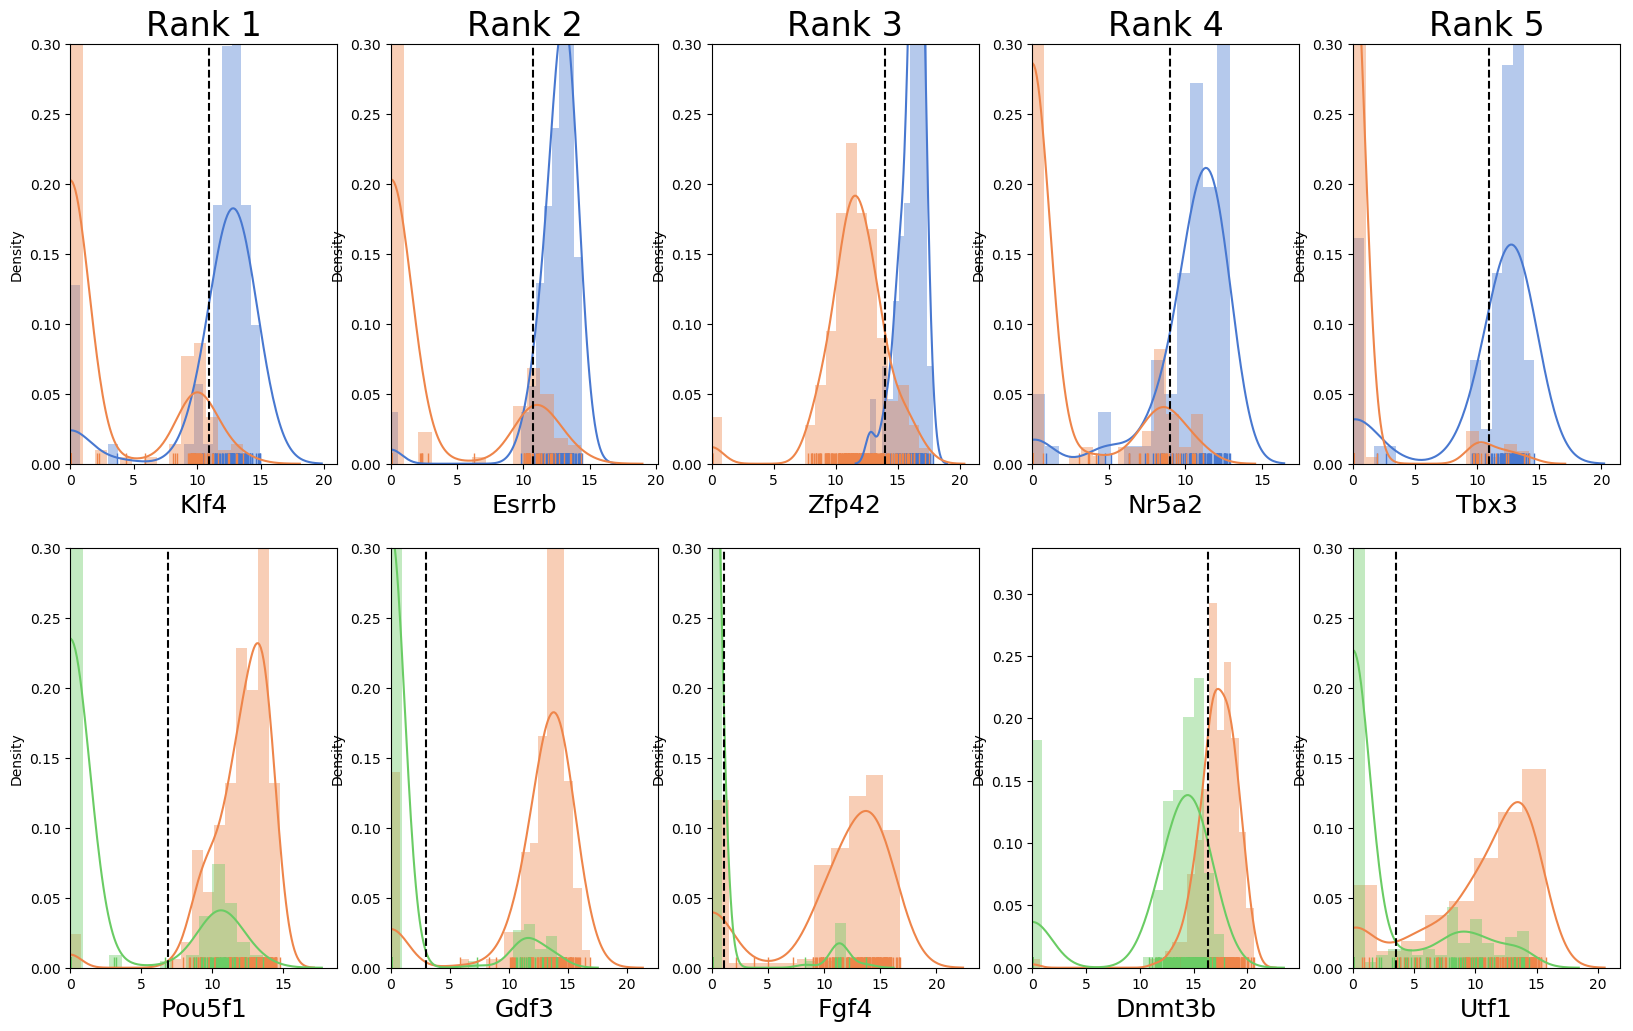

C:\Users\jedfo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jedfo\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\jedfo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jedfo\anaconda3\lib\site-packages\seaborn\distr

In [14]:
RepeatedDecisionStumping.plot_thresholds(mur_data, mur_data.Classification, mur_stumps, repeats, collect(1:repeats), mur_transitions, (20,12))

#### γ stability analysis

We can investigate the stability of the features selected by training the models on many random partitions of the data and calculating the γ score for each feature. This measures how highly and consistently the features are ranked by ReDX over the different partitions. 

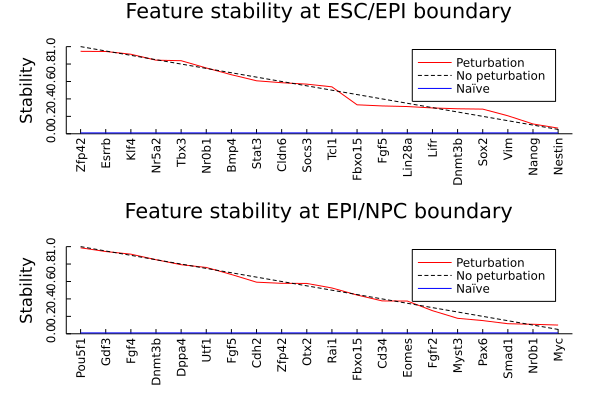

In [26]:
# partitions  - how many random partitions of the data
# quota    - at each partition, consider and score the top 'quota' of features
# tt_split - the training-test division
partitions = 100
quota = 20
report = 20
tt_split = 0.8
stability_df = RepeatedDecisionStumping.rs_stability(mur_data, mur_transitions,
 partitions, quota, report, tt_split, false)


RepeatedDecisionStumping.stability_plot(mur_data, stability_df, mur_transitions,
 repeats, quota, report)

### Briggs data of *Xenopus tropicalis* embryogenesis

#### Data entry

Read the _Briggs et al._ gene expression and annotation data for _Xenopus tropicalis_ embryogenesis into dataframes (large files, ~15 minutes) 

In [43]:
r = ZipFile.Reader("../data/xenopus/xenopus_expression.csv.zip");
xen_df = CSV.read(r.files[1], DataFrame);
close(r)

In [34]:
# Read in the associated annotations, adding the Celltype label to the xen_df
xen_labels = CSV.read("../data/xenopus/xenopus_annotations.csv", DataFrame);

xen_df.Classification = xen_labels.Cluster_Label;

Stipulate the transitions we want to characterise and how many features to report for each transition

In [35]:
xen_transitions = [["S08-blastula","S08-blastula","S08-blastula","S08-blastula",
 "S08-blastula","S08-blastula"] ["S10-neuroectoderm", "S10-non-neural ectoderm",
 "S10-marginal zone", "S10-Spemann organizer (mesoderm)",
 "S10-Spemann organizer (endoderm)", "S10-endoderm"]]

6×2 Matrix{String}:
 "S08-blastula"  "S10-neuroectoderm"
 "S08-blastula"  "S10-non-neural ectoderm"
 "S08-blastula"  "S10-marginal zone"
 "S08-blastula"  "S10-Spemann organizer (mesoderm)"
 "S08-blastula"  "S10-Spemann organizer (endoderm)"
 "S08-blastula"  "S10-endoderm"

#### Analysis

In [36]:
repeats = 5;
tt_split = 0.8;

Learn the decision stumps for the transitions from the data

In [37]:
Random.seed!(1234);

In [38]:
xen_stumps = RepeatedDecisionStumping.grouped_iterative_stumper(xen_df, xen_transitions, repeats, tt_split)

,Transition,Rank,Id,Name
,String,Int64,Int64,Any
1,S08-blastula - S10-neuroectoderm,1,5345,LOC734001_LOC728026
2,S08-blastula - S10-neuroectoderm,2,16229,eef1a1_EEF1AS
3,S08-blastula - S10-neuroectoderm,3,15094,cirbp_CIRBP
4,S08-blastula - S10-neuroectoderm,4,11839,Xetrov90028359m_GSK3B
5,S08-blastula - S10-neuroectoderm,5,23516,sox2_SOX2
6,S08-blastula - S10-non-neural ectoderm,1,5345,LOC734001_LOC728026
7,S08-blastula - S10-non-neural ectoderm,2,16229,eef1a1_EEF1AS
8,S08-blastula - S10-non-neural ectoderm,3,1027,LOC100488209_MUC5B
9,S08-blastula - S10-non-neural ectoderm,4,15094,cirbp_CIRBP


Can export a LaTeX friendly version of this table to a .txt file 

In [48]:
# Filter for the column names desired in the final table
cols = [:Transition, :Rank, :Name, :Threshold, :Accuracy, :F1, :Progress];
succinct = xen_stumps[!, cols];

# Write out the finished table into a LaTeX friendly format
RepeatedDecisionStumping.latex_table_from_dataframe(succinct, "../output/ReDX_table_xenopus.txt")

2555

#### Visualising learnt thresholds

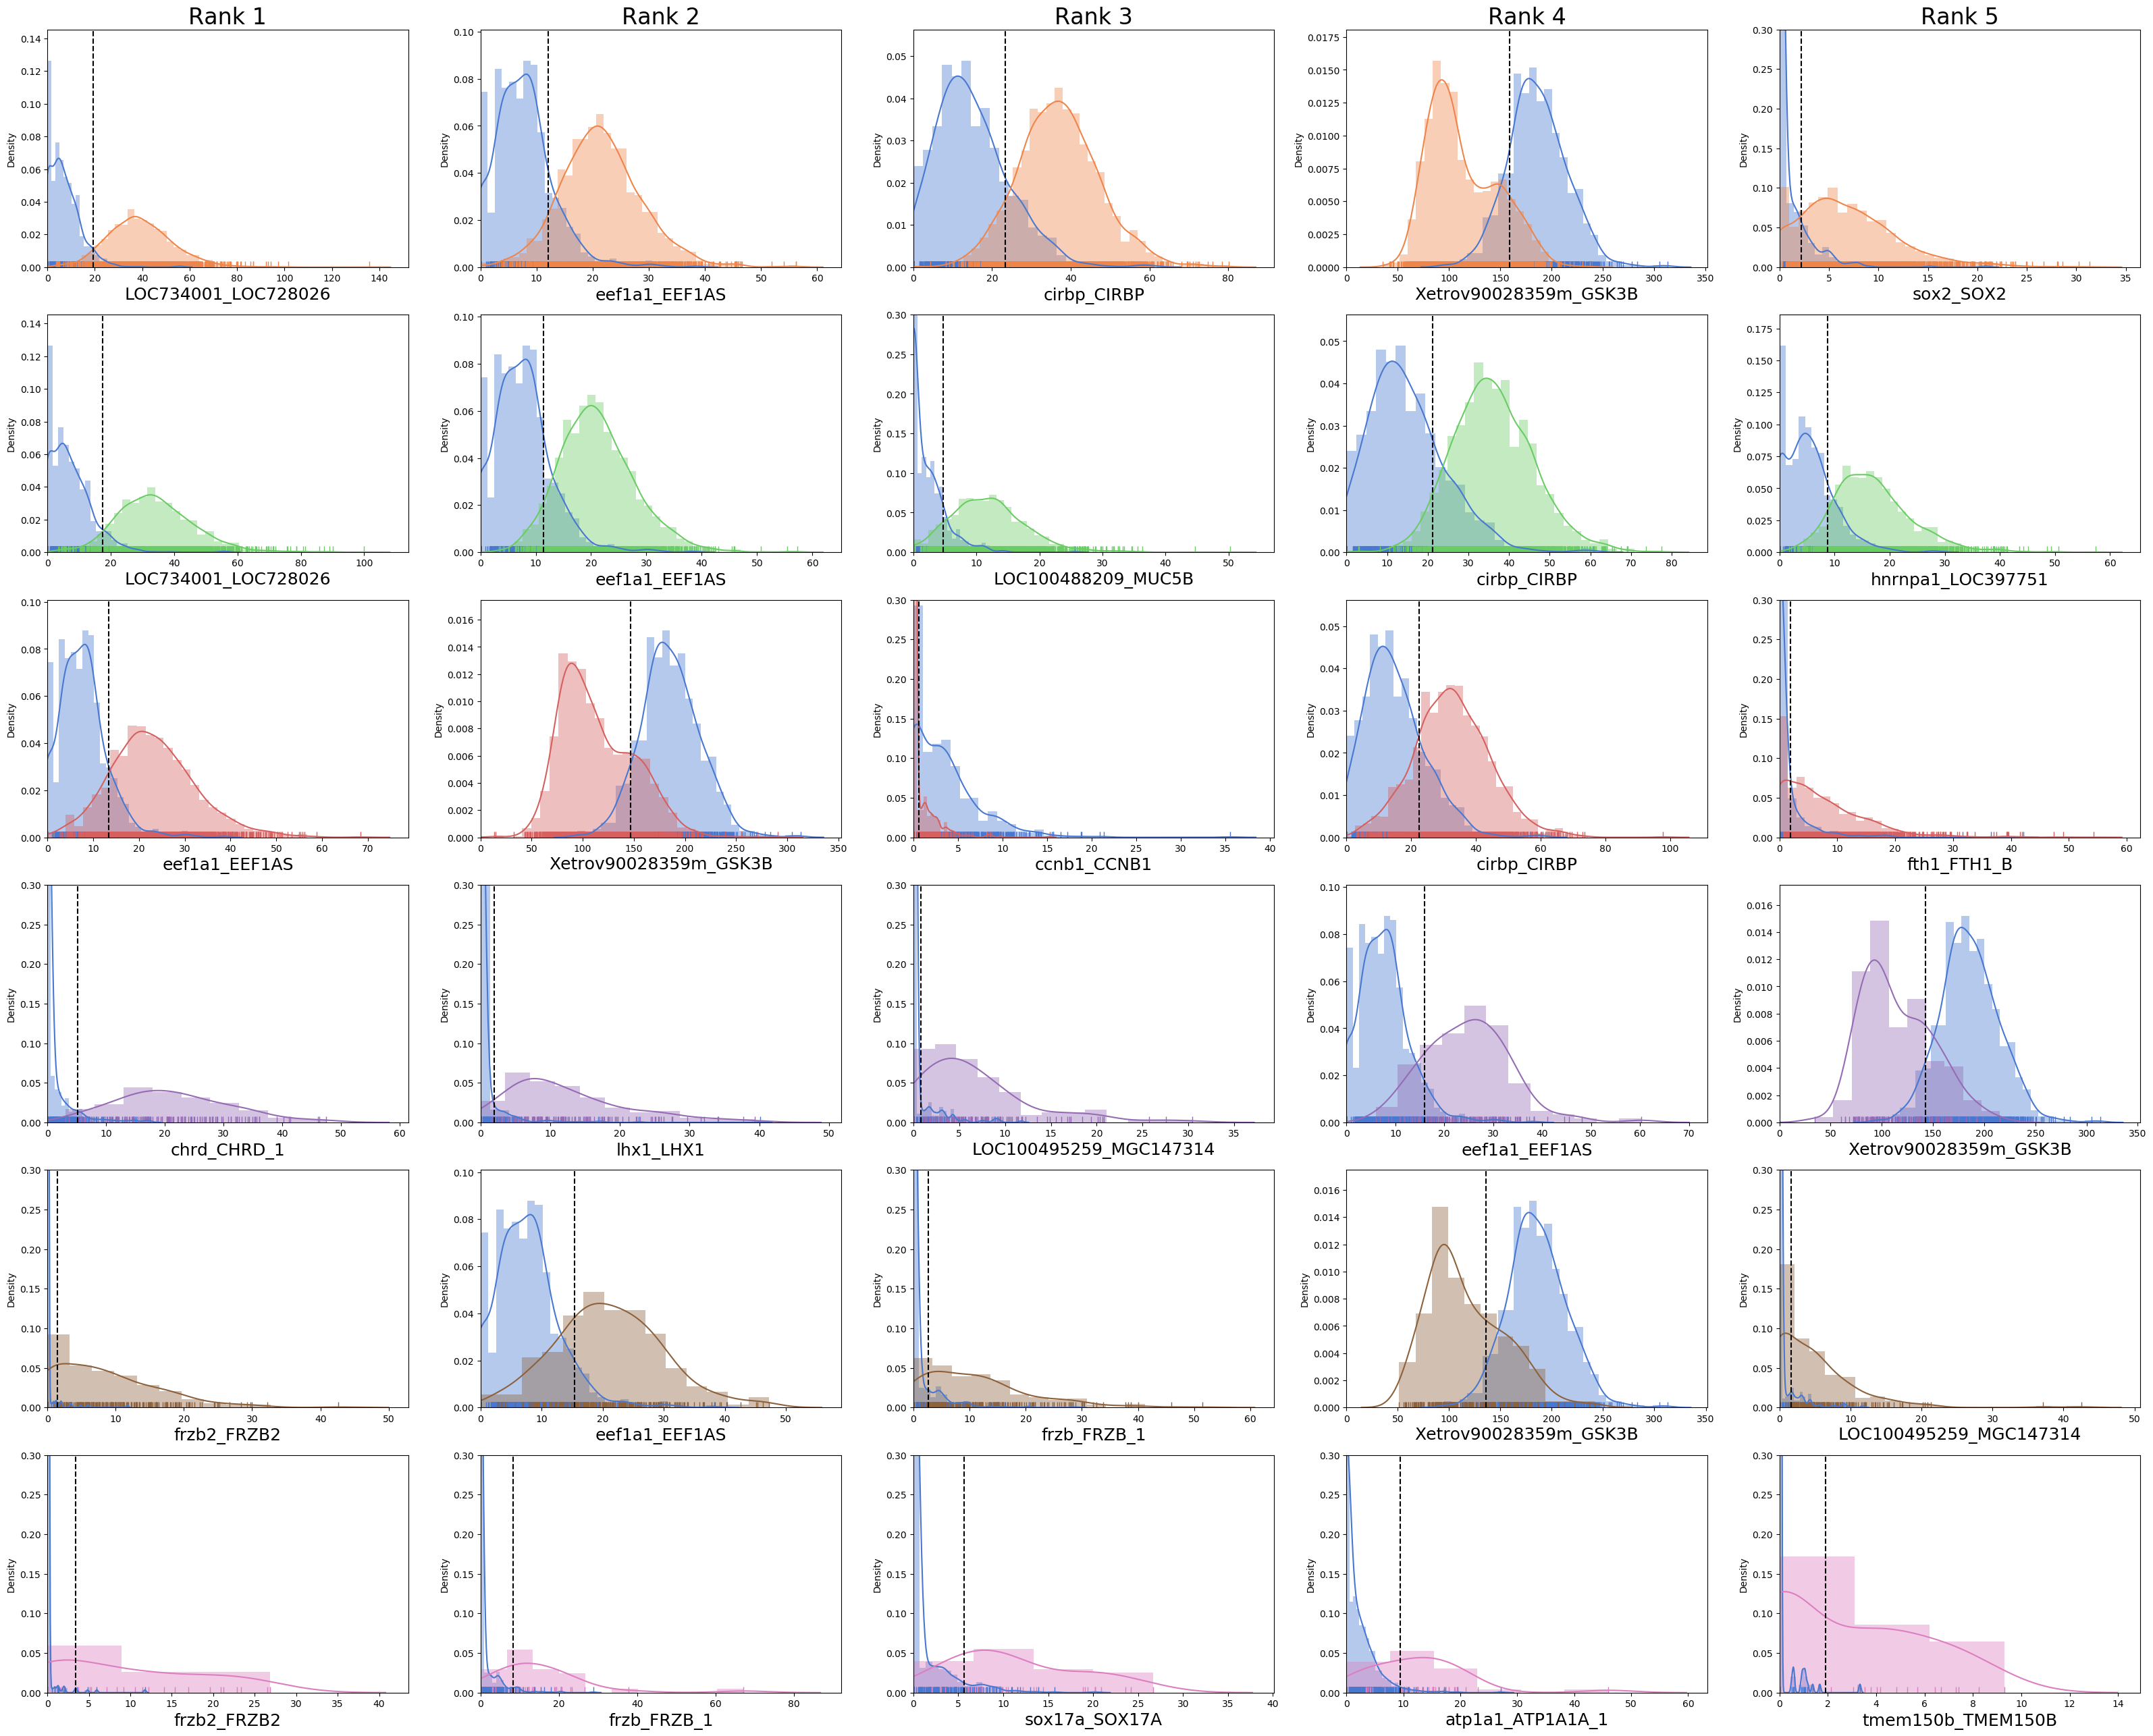

C:\Users\jedfo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jedfo\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\jedfo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jedfo\anaconda3\lib\site-packages\seaborn\distr

In [41]:
RepeatedDecisionStumping.plot_thresholds(xen_df, xen_df.Classification, xen_stumps, repeats, collect(1:repeats), xen_transitions, (40,32))